<a href="https://colab.research.google.com/github/kimfungg/PythonProject1/blob/master/Kimberly_Fung_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. DATA EXPLORATION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
%matplotlib inline

#DATA
missing_values={'na','s'}
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values=missing_values)
df

#df.head()
#df.describe() # the calculations are not an accurate representation of the data, ex. need to use weighted avg

#create a list of all schools then find unique of that list:
school_names = unique(df['School Name'])
for unique_schools in school_names:
  print(unique_schools)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


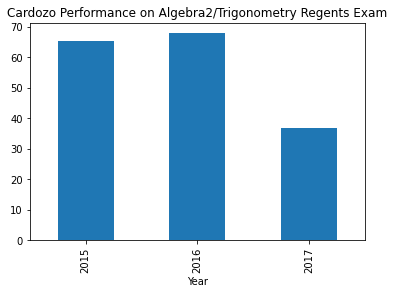

In [1]:
# 2. CALCULATE WEIGHTED AVG & ANALYZE BENJAMIN N. CARDOZO HS PERFORMANCE ON ALGEBRA2/TRIG EXAM

# Weighted avg should be used in order to calculate the mean per year because there are multiple rows 
# that includes the mean of total tested reported per year for the same exam. The bar graph below shows 
# that the students who took the Algebra2/Trig Exam in 2016 performed slightly better than 2015, with an avg score of 
# 67 compared to 65 respectively. This seems like a difficult exam because most students are barely passing.
# Additionally, it seems like the 2017 data is incomplete, but of those reported, they did not do well 
# based on their average score of 36.9.

# I also considered including the minimum and maximum values of the original avg scores in 2017 in my analysis.
# Without access to the line level data, the min/max of the aggregate level data cannot be compared to my calculations 
# of the weighted averages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
%matplotlib inline

#DATA
missing_values={'na','s'}
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values=missing_values)
df

#DF FILTERED ON CARDOZO & ALGEBRA2/TRIGONOMETRY - USED FOR CARDOZO AVG
algebra_dozo=df[(df['School DBN'] == '26Q415') &  (df['Regents Exam'] == 'Algebra2/Trigonometry')]


#CALCULATE WEIGHTED AVG TO DETERMINE TRUE AVG PER YEAR
  #first, define a function - weighted average
def wavg(group, weight_name, avg_name):
  d = group[weight_name]
  w = group[avg_name]
  return (d * w).sum() / d.sum()

  #then apply to groupby for Year & Weighted Avg for Cardozo Algebra2/Trig exam (dataset= algebra_dozo):
algebra_dozo.groupby('Year').apply(wavg,"Total Tested","Mean Score")

  #BAR GRAPH SHOWING CARDOZO PERFORMANCE (AVERAGE) ON ALGEBRA2/TRIG EXAM PER YEAR
dozo_performance_plot=algebra_dozo.groupby('Year').apply(wavg,"Total Tested","Mean Score").plot(kind='bar',x='Year',y=wavg, title='Cardozo Performance on Algebra2/Trigonometry Regents Exam')
dozo_performance_plot.set_xlabel='Year'
dozo_performance_plot.set_ylabel='Weighted Average'


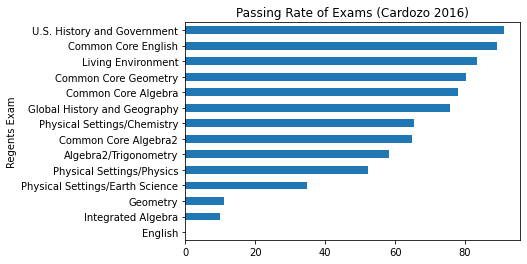

In [2]:
# 3. CALCULATE TOTAL PERCENT & ANALYZE FAILING AND PASSING RATES FOR EXAMS TAKEN BY BENJAMIN N CARDOZO HS STUDENTS

# I calculated the total percent of those who failed (score below 65) and those who passed (score 65 or above).
# Then, I wanted to see which exams are considered the hardest based on failing rate. Based on the bar graph, it appears that the
# Physical Settings/Earth Science exam had the highest failing rate of 61.9% of students scoring below 65.
# Similarly, I wanted to compare those results with passing rates and found that only 34.7% passed the Physical Settings/
# Earth Science exam. Additionally the U.S History and Government exam seems to have the highest passing rate of
# 91.2%, which could mean that it's one of the easier exams compared to the rest. There seems to be insufficient data
# for some of the exams such as Geometry, Integrated Algebra, and English based on inconsistencies seen in both
# passing and failing datasets.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
%matplotlib inline

#DATA
missing_values={'na','s'}
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values=missing_values)
df

#DF FILTERED ON BENJAMIN N. CARDOZO HS
dozo=df[(df['School DBN'] == '26Q415')]

#DF FILTERED ON CARDOZO & YEAR
dozo2015 = df[(df['School DBN'] == '26Q415') & (df['Year'] == 2015)]
dozo2016 = df[(df['School DBN'] == '26Q415') & (df['Year'] == 2016)]
dozo2017 = df[(df['School DBN'] == '26Q415') & (df['Year'] == 2017)]

#CALCULATE PERCENT FOR FAILING & PASSING
  #define total percent calculation fuction
def total_perc(group, numerator, denominator):
  a = group[numerator]
  b = group[denominator]
  return (a.sum()/b.sum())*100

#DETERMINE THE HARDEST/EASIEST EXAMS BASED ON FAILING/PASSING RATE IN 2016
  #Pass vs Failing
failing=dozo2016.groupby(['Regents Exam']).apply(total_perc,"Number Scoring Below 65","Total Tested").sort_values(ascending=True)
#failing
passing=dozo2016.groupby(['Regents Exam']).apply(total_perc,"Number Scoring 65 or Above","Total Tested").sort_values(ascending=True) 
#passing

  #bar graph of exams with failing rates (sorted by highest failing rates)
#failing_plot=failing.plot(kind='barh',x='Regents Exam',y=total_perc, title='Failing Rate of Exams (Cardozo 2016)')
#failing_plot.set_xlabel='Exam'
#failing_plot.set_ylabel='Percent Scoring Below 65'

  #bar graph of exams with passing rates (sorted by highest passing rates)
passing_plot=passing.plot(kind='barh',x='Regents Exam',y=total_perc, title='Passing Rate of Exams (Cardozo 2016)')
passing_plot.set_xlabel='Exam'
passing_plot.set_ylabel='Percent Scoring 65 or Above'


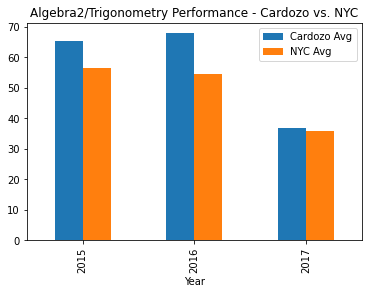

In [3]:
# 4. ANALYZE BENJAMIN N CARDOZO HS VS NYC PERFORMANCE ON ALGEBRA2/TRIG EXAM
# Weighted average was calculated for both datasets (Cardozo & NYC average - Algebra2/Trig exam).
# Both datasets had to be merged in order to be plotted on the same graph. The bar graph
# shows the weighted average Algebra2/Trigonometry score of Cardozo and NYC by year. Cardozo's performance
# is represented by blue bars while NYC's performance is represented by orange bars. Based on the bar graph,
# it appears that Cardozo is outperforming NYC based on their average test scores for all 3 years.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
%matplotlib inline

#DATA
missing_values={'na','s'}
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values=missing_values)
df

#DF FILTERED ON CARDOZO & ALGEBRA2/TRIGONOMETRY - USED FOR CARDOZO AVG
algebra_dozo=df[(df['School DBN'] == '26Q415') &  (df['Regents Exam'] == 'Algebra2/Trigonometry')]

#DF FILTERED ON ALGEBRA2/TRIGONOMETRY FOR ALL SCHOOLS - USED FOR NYC AVG
algebra2=df[(df['Regents Exam'] == 'Algebra2/Trigonometry')]

#CALCULATE WEIGHTED AVG TO DETERMINE TRUE AVG PER YEAR
  #first, define a function - weighted average
def wavg(group, weight_name, avg_name):
  d = group[weight_name]
  w = group[avg_name]
  return (d * w).sum() / d.sum()

#COMPARISON OF CARDOZO PERFORMANCE VS NYC PERFORMANCE BASED ON AVERAGE SCORE ON ALGEBRA2/TRIG EXAM
  #NYC AVG using algebra2 dataset for all schools & weighted avg across all years
algebra_all=algebra2.groupby('Year').apply(wavg,"Total Tested","Mean Score").reset_index(name='NYC Avg')
  #Cardozo AVG using algebra_dozo dataset for Cardozo & weighted avg across all years
algebra_dozo_only=algebra_dozo.groupby('Year').apply(wavg,"Total Tested","Mean Score").reset_index(name='Cardozo Avg')
  #merge (inner join) both datasets above named algebra_all, algebra_dozo -- inner join required otherwise shows NaN values while concatenating
algebra_avg=pd.merge(algebra_dozo_only, algebra_all, on='Year').set_index(['Year'])
algebra_avg
  #bar graph comparing Cardozo performance against NYC avg for 2015-2017
NYCvsDozo_plot=algebra_avg.plot(kind='bar',title='Algebra2/Trigonometry Performance - Cardozo vs. NYC')
NYCvsDozo_plot.set_xlabel='Year'
NYCvsDozo_plot.set_ylabel='Average'
